## Assignment #2 
## Predictive Analytics BDM500
# Anna Jazayeri 131661209

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import graphviz


%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the dataset. 

## I got this dataset from Kaggle website:
https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data?select=HousingData.csv

**The dataset that I used for solving the lab 05 did not have missing values, but the dataset that is in the kaggle website had missing values, so I thought maybe the kaggle dataset is the correct one.**

Also I got the following information about the name of columns from the kaggle website that I mentioned the link above:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 dollars
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000's dollars
    

In [3]:
boston = pd.read_csv("HousingData.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Preprocessing on the dataset.

In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Missing values

In [5]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# removing the missing values

boston.dropna(inplace=True)
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Outliers

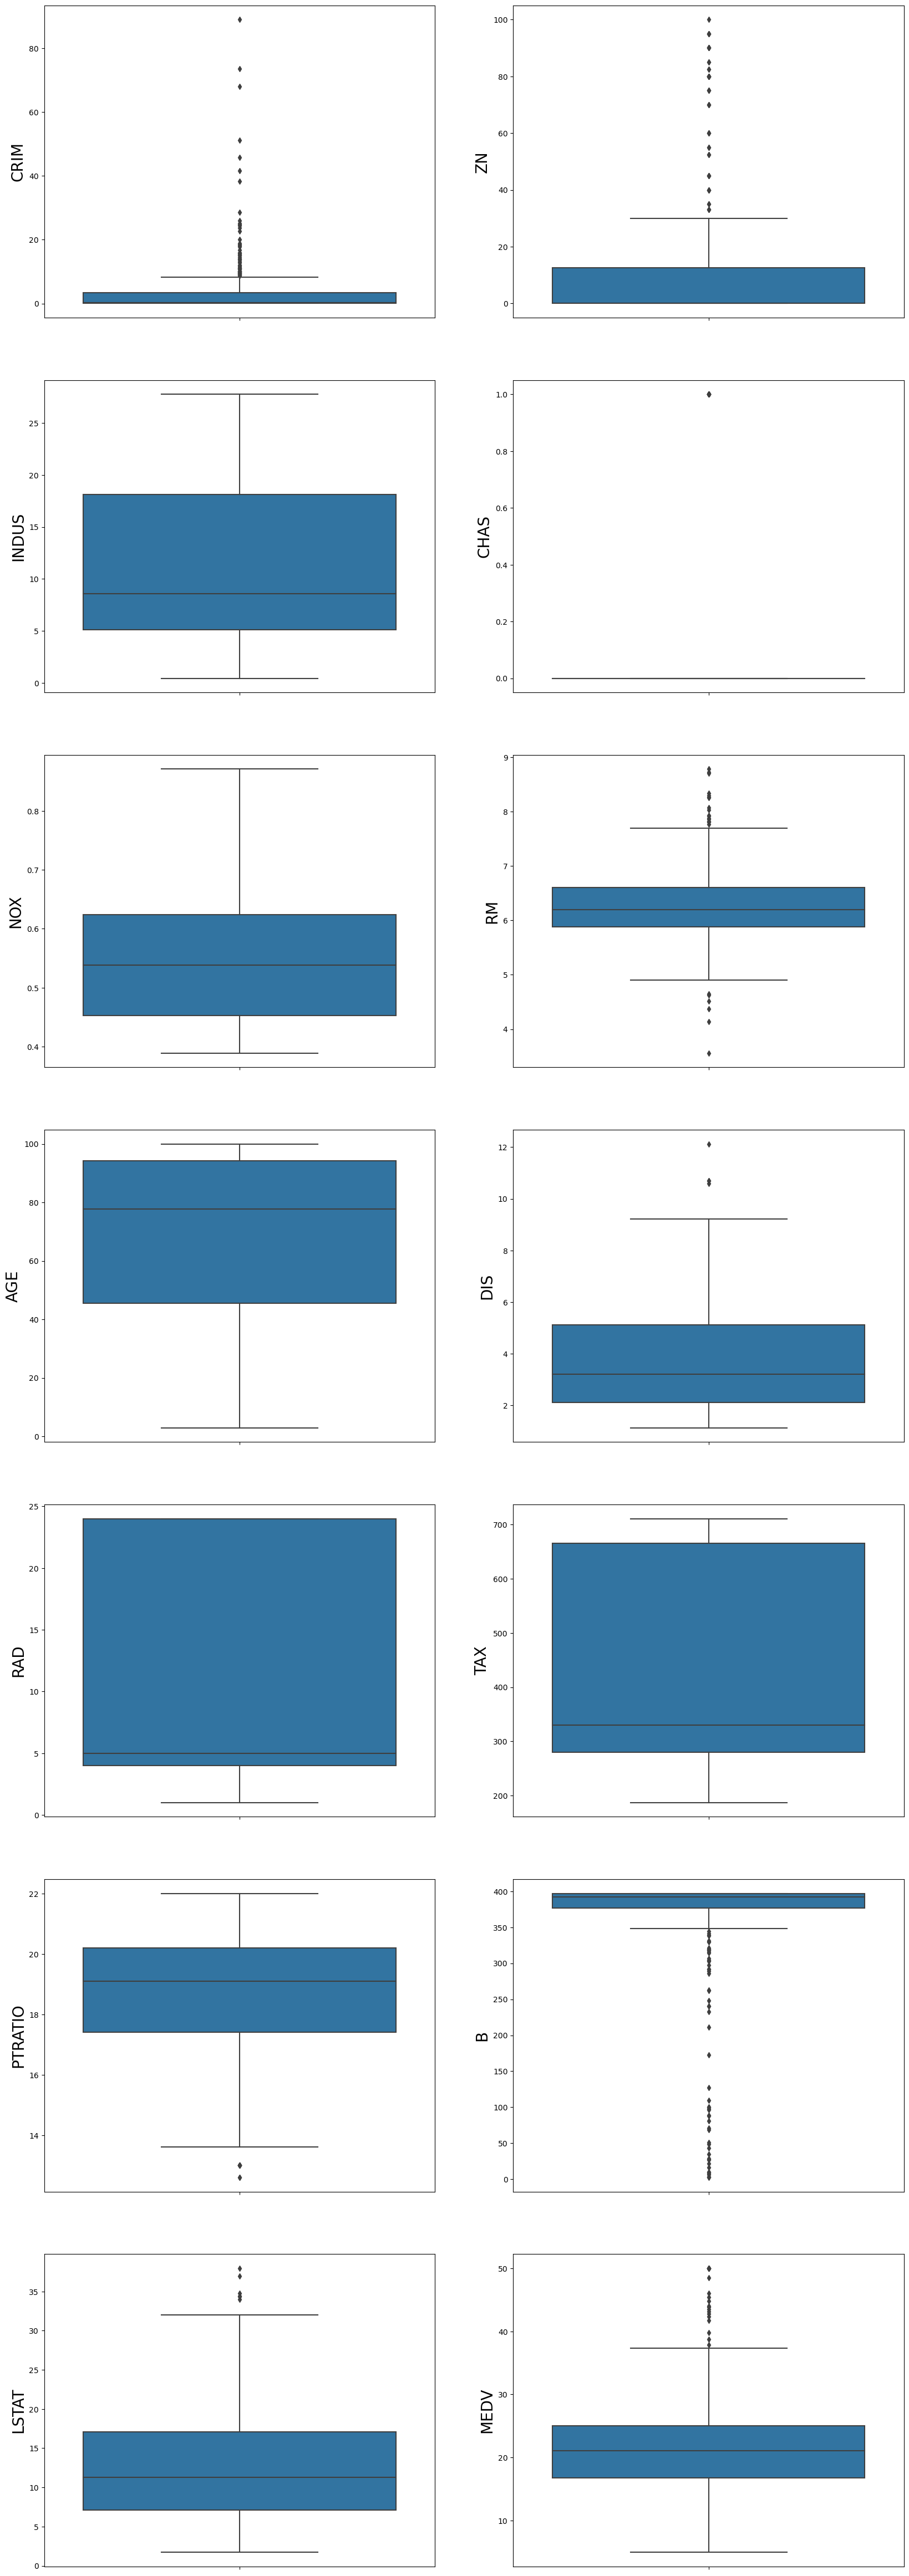

In [14]:
plt.show()
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(20, 60))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    ax = sns.boxplot(y=k, data=boston, ax=axs[index])
    ax.set_ylabel(k, fontsize=20)  # Adjust the font size as needed
    index += 1
plt.show()

Columns such as CRIM, ZN, RM, and B appear to exhibit outliers. Let's examine the percentage of outliers in each of these columns.

In [15]:
from scipy import stats
for k, v in boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.71%
Column ZN outliers = 12.69%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.84%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.05%
Column B outliers = 14.72%
Column LSTAT outliers = 1.52%
Column MEDV outliers = 6.85%


In [16]:
# removing outliers before visualization
boston = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston))

(382, 14)


# Visualization

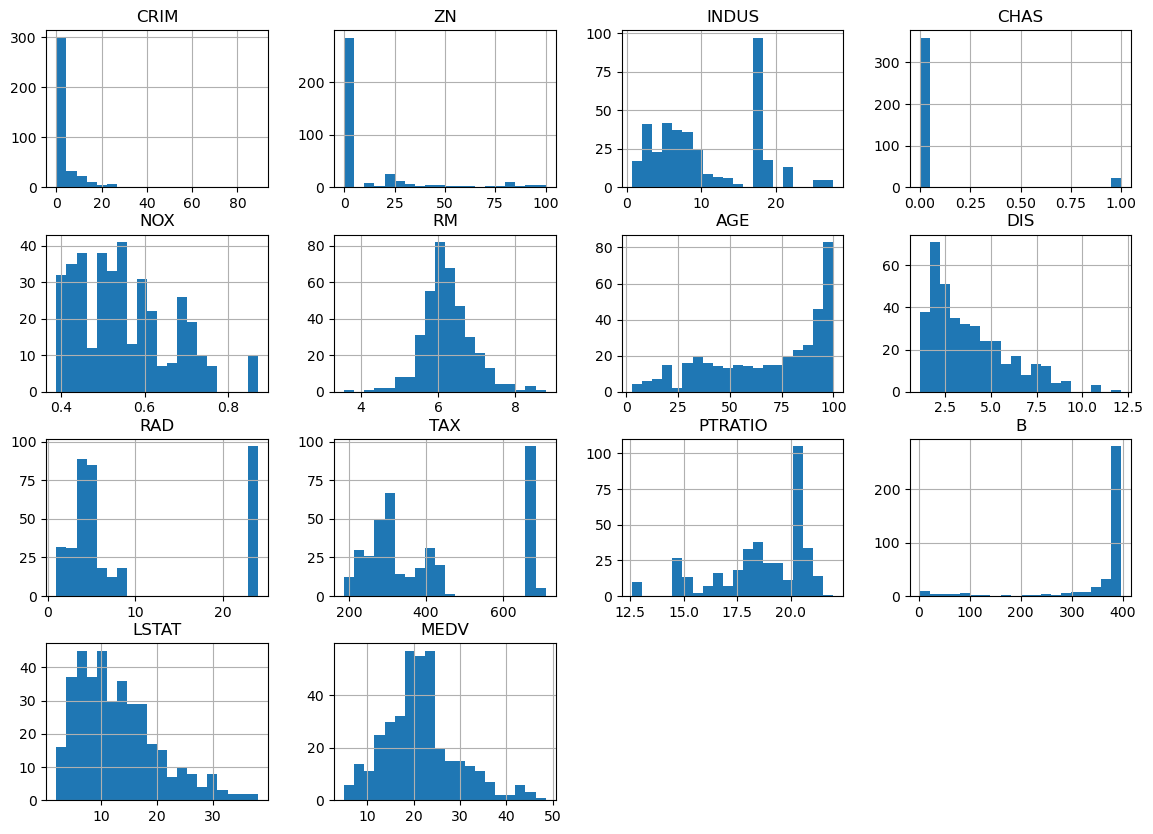

In [17]:
# histogram of different features
boston.hist(bins=20, figsize=(14, 10))
plt.show()


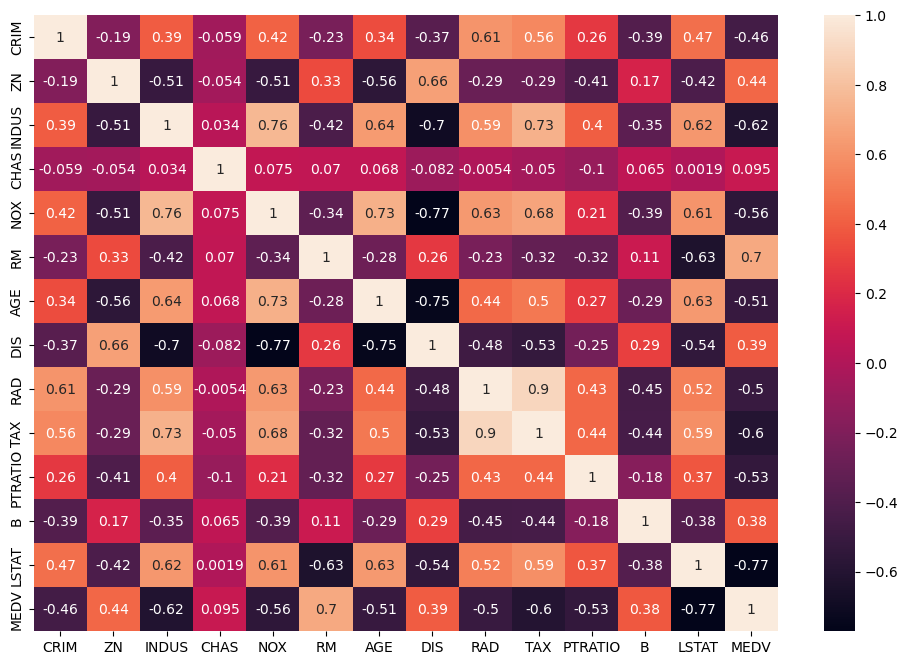

In [18]:
import seaborn as sns
# Correlation matrix heatmap
corr_mat = boston.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True)
plt.show()

In the following I will show **scatterplots** of those features that have the **columns with correlation >= 0.5 or <= -0.5** with target value that is **MEDV - Median value of owner-occupied homes in 1000's dollars**, those that are very close to 1 or -1. 

INDUS - proportion of non-retail business acres per town. +0.62<br>
NOX - nitric oxides concentration (parts per 10 million)  -0.56<br>
RM - average number of rooms per dwelling                 +0.70<br>
AGE - propor of owner-occupied units built prior to 1940  -0.51<br>
RAD - index of accessibility to radial highways           -0.50<br>
TAX - full-value property-tax rate per 10,000 dollars     -0.60<br>
PTRATIO - pupil-teacher ratio by town                     -0.53<br>
LSTAT - % lower status of the population                  -0.77<br>


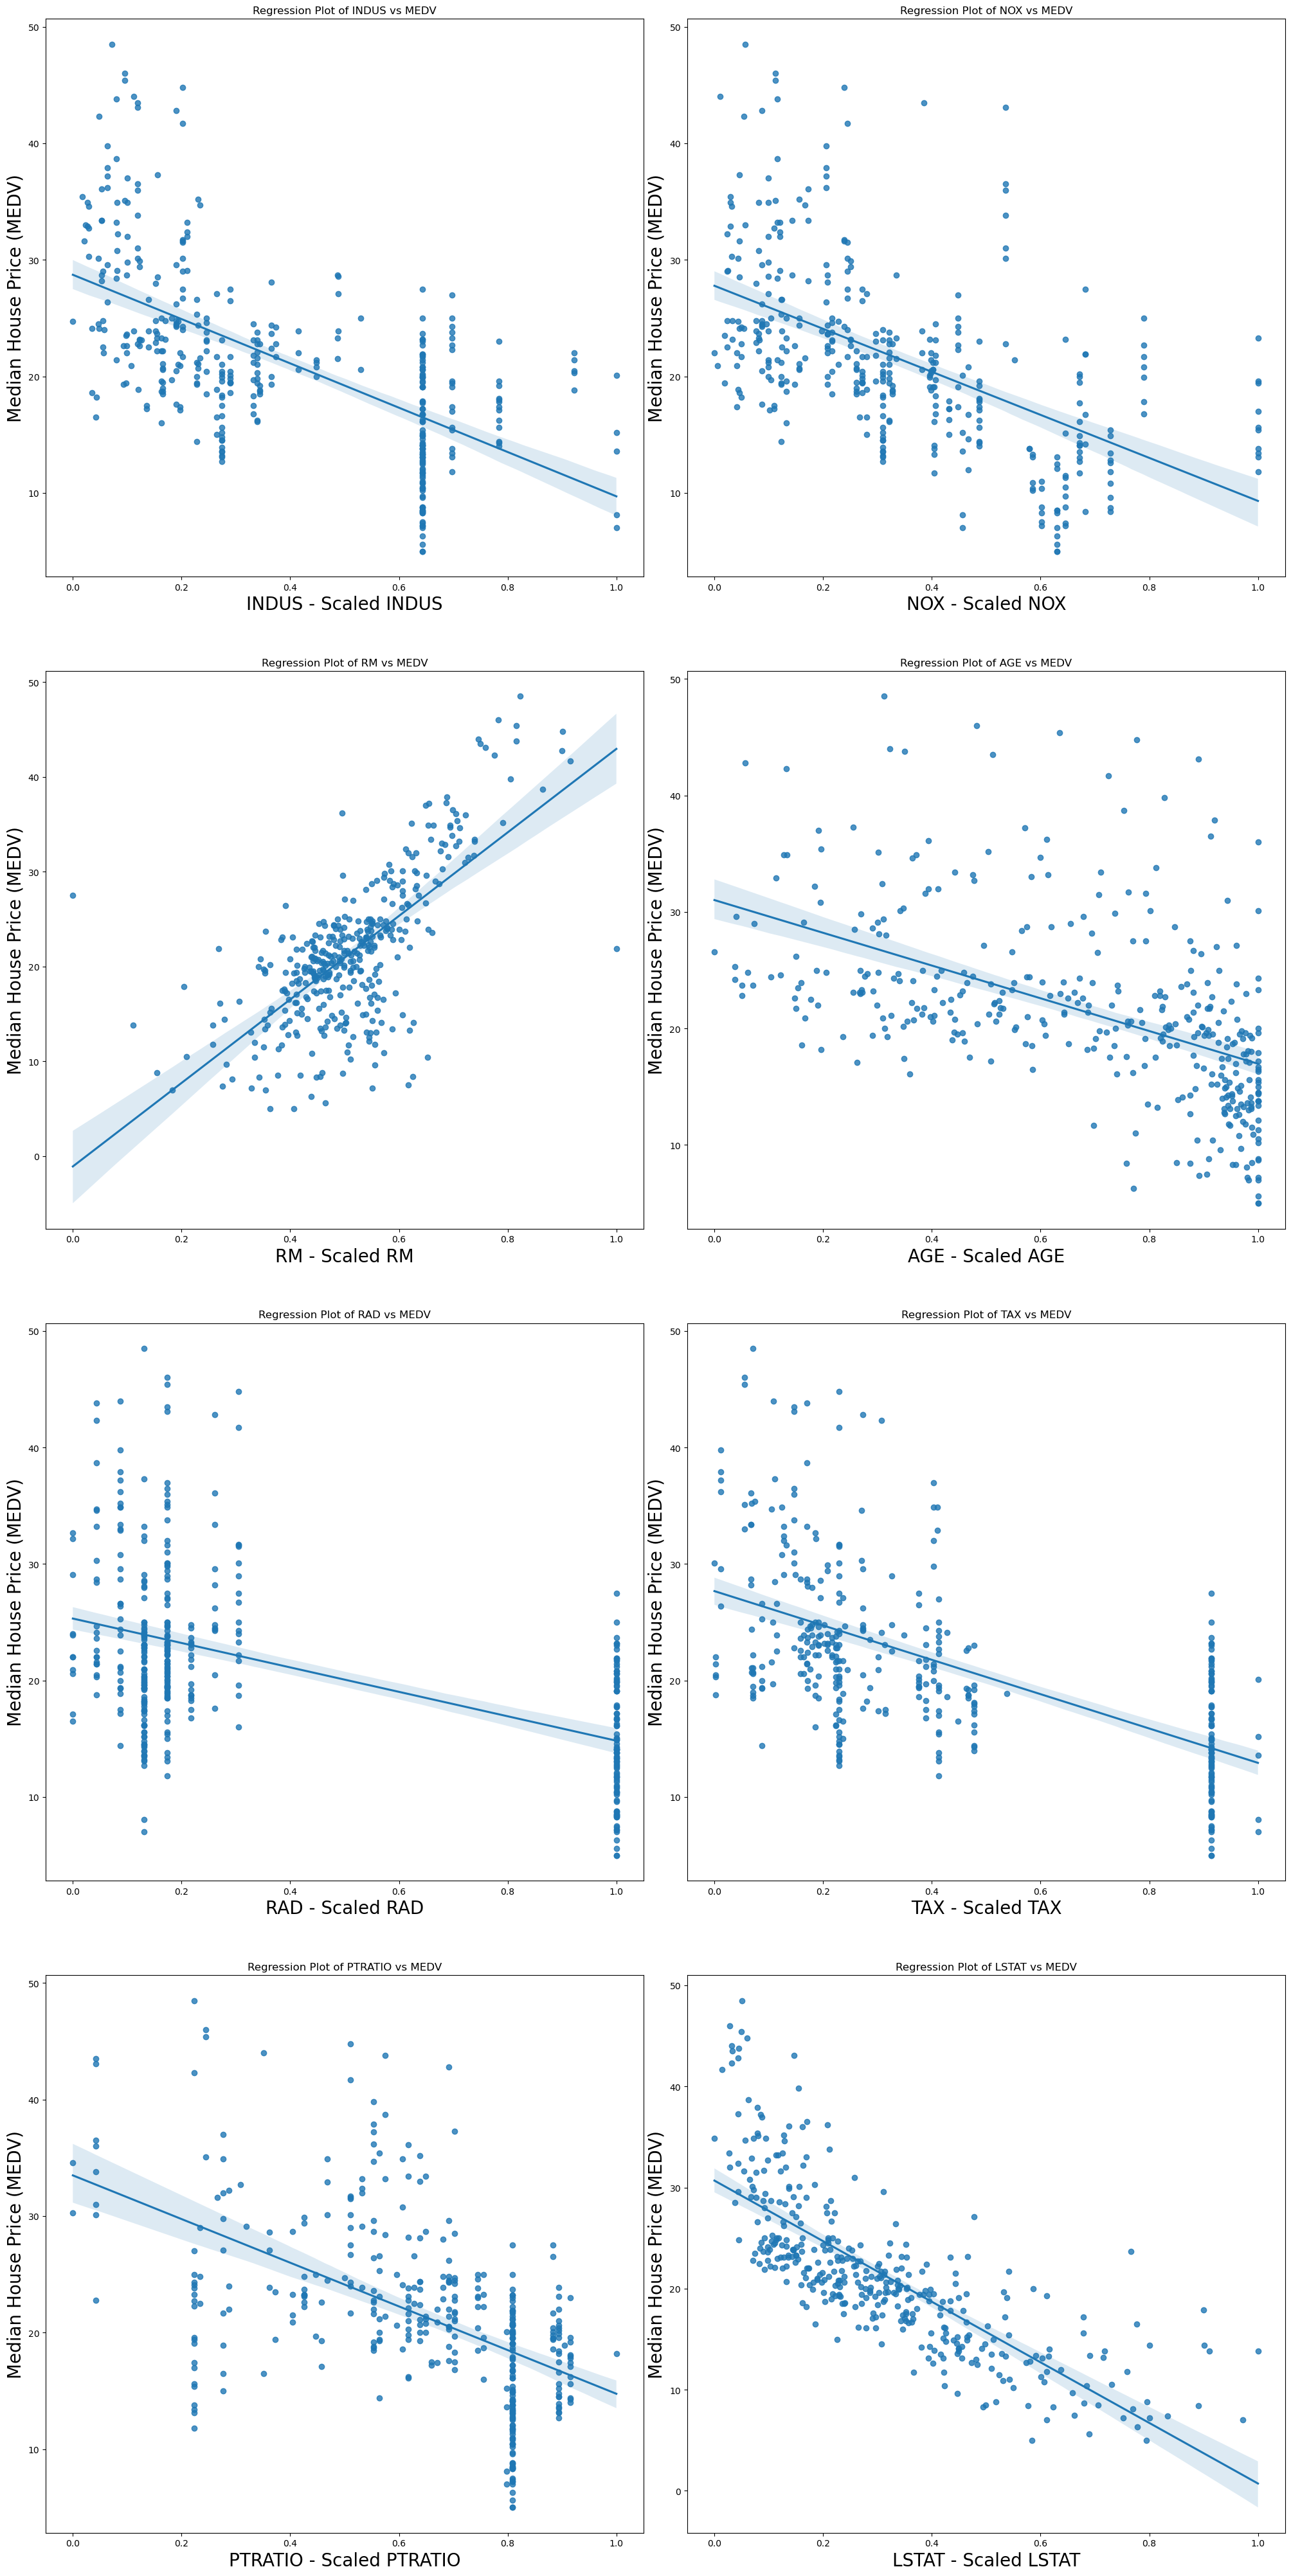

In [19]:
from sklearn import preprocessing

# List of columns with correlation >= 0.5 or <= -0.5 with 'MEDV'
high_corr_cols = ['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# Create a copy of the dataframe and apply Min-Max scaling to the selected columns
scaled_boston = boston.copy()
min_max_scaler = preprocessing.MinMaxScaler()
scaled_boston[high_corr_cols] = min_max_scaler.fit_transform(scaled_boston[high_corr_cols])

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 40))
axs = axs.flatten()

for i, col in enumerate(high_corr_cols):
    ax = sns.regplot(x=col, y='MEDV', data=scaled_boston, ax=axs[i])
    ax.set_xlabel(k, fontsize=20)
    ax.set_ylabel(k, fontsize=20) 
    axs[i].set_xlabel(f'{col} - Scaled {boston[col].name}')
    axs[i].set_ylabel('Median House Price (MEDV)')
    axs[i].set_title(f'Regression Plot of {col} vs MEDV')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()



## Based on the above scatterplots we have a lot of skewness in some columns, so first and before starting to create predictive models, we should remove the skewness. 

In [20]:
skew_threshold = 0.3

# Log-transform the target variable 'MEDV'
scaled_boston['MEDV'] = np.log1p(scaled_boston['MEDV'])

# Log-transform features with skewness greater than the threshold
for col in high_corr_cols:
    if np.abs(scaled_boston[col].skew()) > skew_threshold:
        scaled_boston[col] = np.log1p(scaled_boston[col])


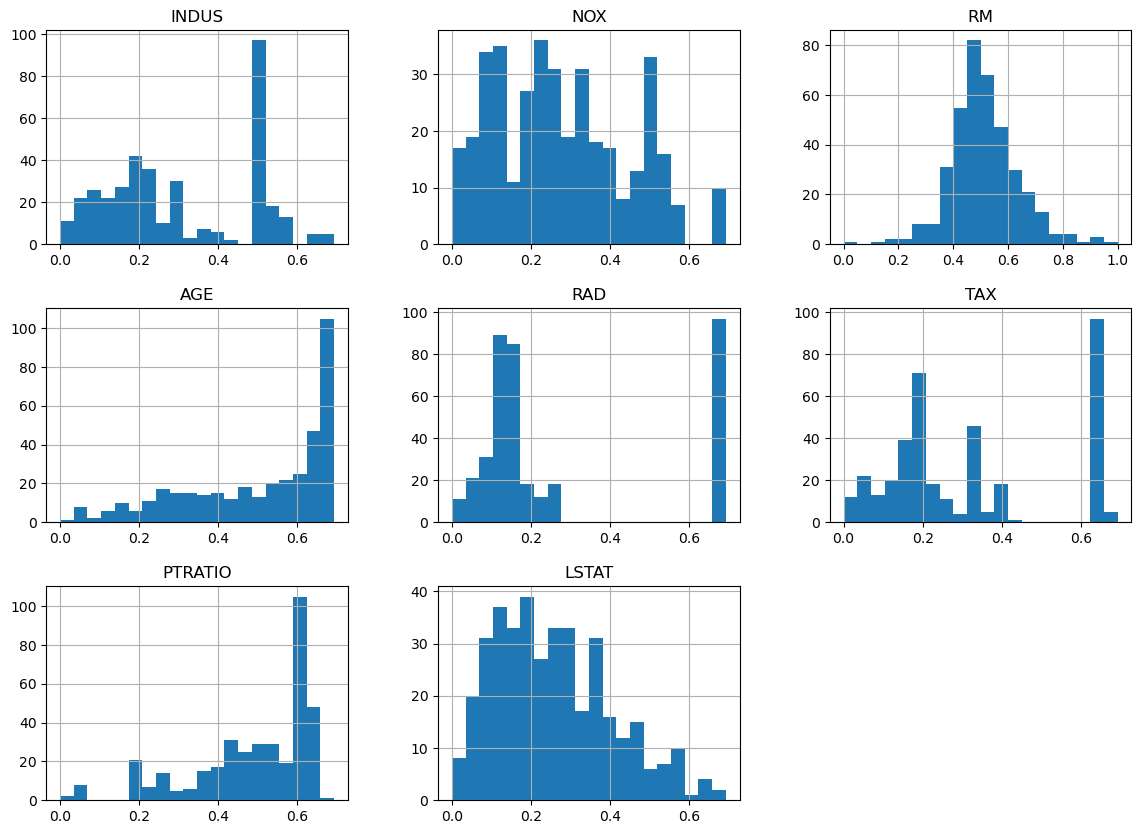

In [21]:
# histogram for new non-skewed columns
scaled_boston[high_corr_cols].hist(bins=20, figsize=(14, 10))
plt.show()


# Split the data into training and testing datasets 

In [22]:
X = boston.drop("MEDV", axis=1)  # Features
y = boston["MEDV"]  # Target variable

# Split the data into train 80% and test 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)


# Create the Regression Tree and evaluating it

## Best complexity parameter (often referred to as hyperparameter tuning)

To find the best settings for our decision tree model, which make it predict better, we can change some values in the model. These values are often called "hyperparameters." In scikit-learn, the important hyperparameter for a decision tree is usually the depth of the tree or the minimum number of examples needed to make a decision.

Here's how we can do it:

    Decide on a range of values to try for these hyperparameters. For instance, we can try different values for the depth of the tree.

    Use a method called cross-validation to test how well our model works with these different hyperparameter values. It's like trying out the model with different settings to see how well it does. We can measure its performance by a number called RMSE.

    We can split our training data into smaller groups and try your model with different hyperparameter values for each group. This helps us make sure our model is working well in different situations.

    Finally, we pick the hyperparameters that give us the lowest RMSE from all the testing. These are the best settings for our model.

In the following codes, I am testing different depth values with 5-fold cross-validation to find the depth that gives the lowest RMSE. This is how we can find the best hyperparameters for our decision tree model. 

Source link: https://www.section.io/engineering-education/hyperparmeter-tuning/

In [31]:
from sklearn.model_selection import cross_val_score

# Speciging the range of max_depth values
max_depth_values = [3, 4, 5, 6, 7, 8, 9, 10]

best_max_depth = None # Initialize variables to keep track of the best hyperparameters 
best_rmse = float('inf') # Initialize variables to keep track of the lowest RMSE

# Iterating through max_depth values
for max_depth in max_depth_values:
    # Creating a Decision Tree Regressor with with max depth 
    regression_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Cross-validation for computing the RMSE
    rmse_scores = np.sqrt(-cross_val_score(regression_tree, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
    
    # Calculating the mean RMSE for this max_depth
    mean_rmse = rmse_scores.mean()
    
    # Updating the best hyperparameters if the current max_depth is better
    if mean_rmse < best_rmse:
        best_max_depth = max_depth
        best_rmse = mean_rmse

# Now we have the best max_depth value, and we can build our best model with it
best_regression_tree = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
best_regression_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=7, random_state=42)

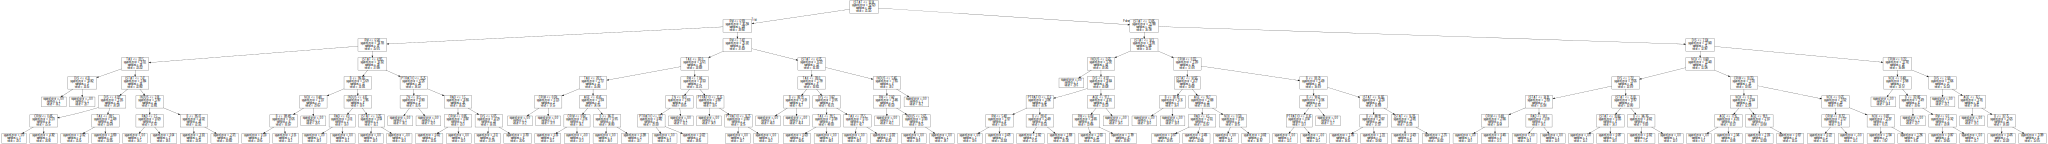

In [32]:
export_graphviz(best_regression_tree, 
                out_file = "best_reg_tree.dot", 
                feature_names = X_train.columns)

with open("best_reg_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Test Set Evaluation:

In [33]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test data
y_pred_test = best_regression_tree.predict(X_test)

# Calculate RMSE on the test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", test_rmse)


Test RMSE: 3.6553993280865678


13.36194424777573

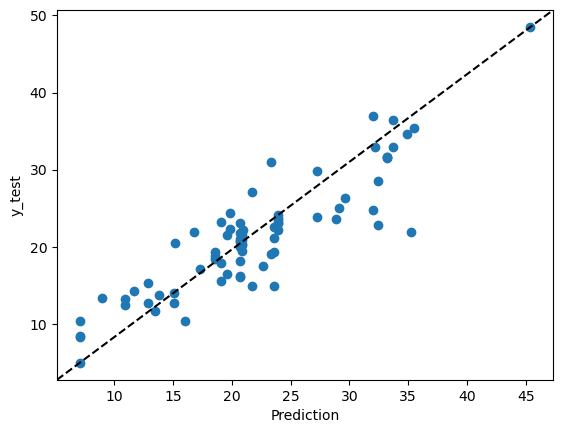

In [34]:
pred = best_regression_tree.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'MEDV')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('Prediction')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

The test model's error, called MSE, is 13.3. If we take the square root of this error, it's about 3.64. This means the model's predictions in the test are usually around $3,640 off from the actual median home value in the neighborhood.

# Bagging

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate RMSE for Random Forest
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Test RMSE:", test_rmse_rf)


Random Forest Test RMSE: 3.5289146596828687


# AdaBoost (Boosting):

In [36]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost Regressor with Decision Trees as base estimators
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=best_max_depth, random_state=42), n_estimators=100, random_state=42)

# Fit the AdaBoost model on the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_regressor.predict(X_test)

# Calculate RMSE for AdaBoost
test_rmse_adaboost = np.sqrt(mean_squared_error(y_test, y_pred_adaboost))
print("AdaBoost Test RMSE:", test_rmse_adaboost)


AdaBoost Test RMSE: 3.5008428278030634


## Plot Model Error vs. Different Values of CP (Complexity Parameter)

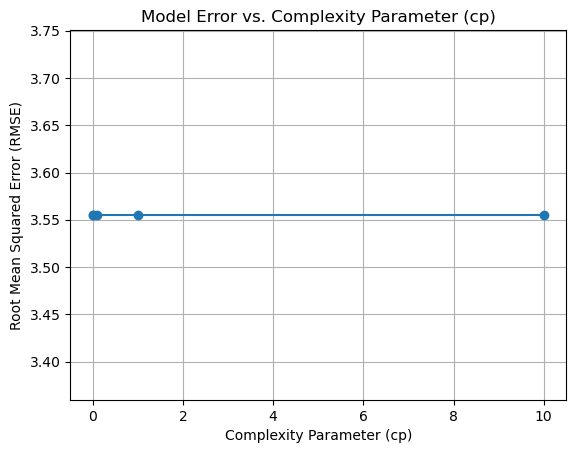

In [38]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Specifying the range of complexity parameter (cp) values
cp_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize lists to store RMSE values
rmse_values = []

for cp in cp_values:
    # Creating a Decision Tree Regressor with the specified complexity parameter (cp)
    # Use a valid integer value for min_samples_split, e.g., 2
    regression_tree = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=2, random_state=42)
    
    # Cross-validation for computing the RMSE
    rmse_scores = np.sqrt(-cross_val_score(regression_tree, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
    
    # Calculating the mean RMSE for this cp
    mean_rmse = rmse_scores.mean()
    
    # Append the mean RMSE to the list
    rmse_values.append(mean_rmse)

# Plot the RMSE values against different values of cp
plt.plot(cp_values, rmse_values, marker='o')
plt.title('Model Error vs. Complexity Parameter (cp)')
plt.xlabel('Complexity Parameter (cp)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid()
plt.show()



## Plot the best tuning parameter cp that minimize the model RMSE

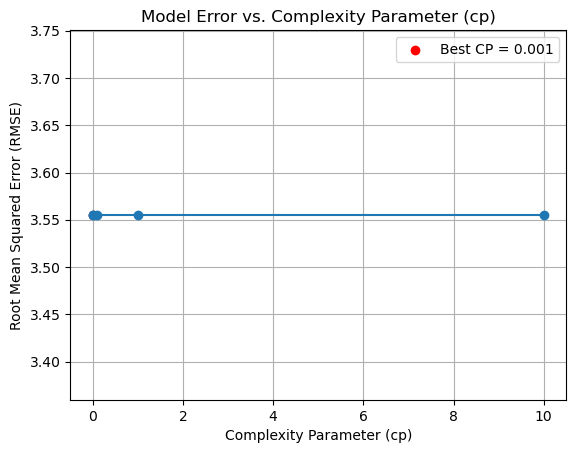

In [39]:
# Find the index of the minimum RMSE value
best_cp_index = np.argmin(rmse_values)
best_cp = cp_values[best_cp_index]
best_rmse = rmse_values[best_cp_index]

# Plot the best tuning parameter (cp) and the corresponding RMSE
plt.plot(cp_values, rmse_values, marker='o')
plt.title('Model Error vs. Complexity Parameter (cp)')
plt.xlabel('Complexity Parameter (cp)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid()

# Mark the best cp value with a red dot
plt.scatter(best_cp, best_rmse, c='red', label=f'Best CP = {best_cp:.3f}')

plt.legend()
plt.show()


## Plot the final tree model

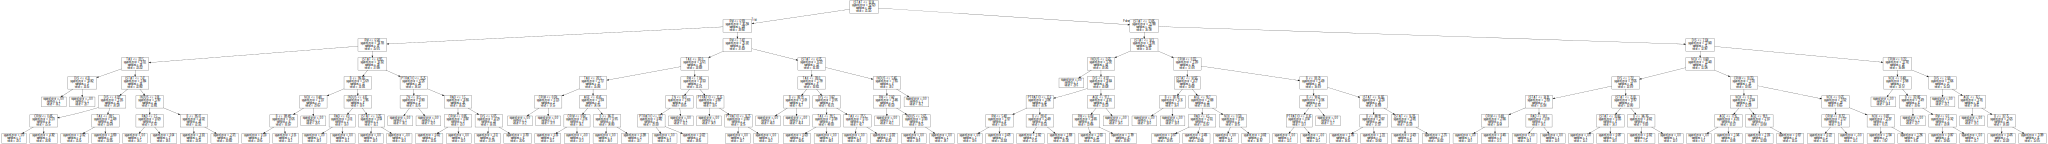

In [40]:
from sklearn.tree import export_graphviz
import graphviz

# Create the final Decision Tree Regressor with the best hyperparameters
final_decision_tree = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_cp, random_state=42)
final_decision_tree.fit(X_train, y_train)

# Export the final tree model to a .dot file
export_graphviz(final_decision_tree, 
                out_file="final_tree_model.dot", 
                feature_names=X_train.columns)

# Visualize the final tree using Graphviz
with open("final_tree_model.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
